In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv("tweets.csv")
df

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...
...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...


In [41]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [42]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweets'], "@[\w]*")

In [43]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


In [44]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweets'], "ENGLISH TRANSLATION:")

In [45]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,name,username,description,location,followers,numberstatuses,time,tweets,clean_tweet
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,MESSAGE TRUTHFUL SYRIA SHEIKH MUHAMMED MAQDISI...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,"SHEIKH FATIH JAWLANI 'FOR PEOPLE INTEGRITY, SA..."
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,FIRST AUDIO MEETING WITH SHEIKH FATIH JAWLANI ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,"SHEIKH NASIR WUHAYSHI (HA), LEADER AQAP: 'THE ..."
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,AQAP: 'RESPONSE SHEIKH BAGHDADIS STATEMENT 'AL...


In [46]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [MESSAGE, TRUTHFUL, SYRIA, SHEIKH, MUHAMMED, M...
1    [SHEIKH, FATIH, JAWLANI, 'FOR, PEOPLE, INTEGRI...
2    [FIRST, AUDIO, MEETING, WITH, SHEIKH, FATIH, J...
3    [SHEIKH, NASIR, WUHAYSHI, (HA),, LEADER, AQAP:...
4    [AQAP:, 'RESPONSE, SHEIKH, BAGHDADIS, STATEMEN...
Name: clean_tweet, dtype: object

In [47]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [messag, truth, syria, sheikh, muham, maqdisi:...
1    [sheikh, fatih, jawlani, 'for, peopl, integrit...
2    [first, audio, meet, with, sheikh, fatih, jawl...
3    [sheikh, nasir, wuhayshi, (ha),, leader, aqap:...
4    [aqap:, 'respons, sheikh, baghdadi, statement,...
Name: clean_tweet, dtype: object

In [48]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,name,username,description,location,followers,numberstatuses,time,tweets,clean_tweet
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,messag truth syria sheikh muham maqdisi: http:...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,"sheikh fatih jawlani 'for peopl integrity, sac..."
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,first audio meet with sheikh fatih jawlani (ha...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,"sheikh nasir wuhayshi (ha), leader aqap: 'the ..."
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,aqap: 'respons sheikh baghdadi statement 'alth...


In [49]:
!pip install wordcloud

In [50]:
!pip install textblob

In [51]:
from textblob import TextBlob
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [52]:
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [53]:
df['Subjectivity']=df['clean_tweet'].apply(getsubjectivity)
df['Polarity']=df['clean_tweet'].apply(getpolarity)

In [54]:
0#Function to compute sentiment of a tweet
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'    

In [55]:
df['Analysis']=df['Polarity'].apply(getAnalysis)
df[['clean_tweet','Analysis']]

,clean_tweet,Analysis
0,messag truth syria sheikh muham maqdisi: http:...,Neutral
1,"sheikh fatih jawlani 'for peopl integrity, sac...",Positive
2,first audio meet with sheikh fatih jawlani (ha...,Positive
3,"sheikh nasir wuhayshi (ha), leader aqap: 'the ...",Neutral
4,aqap: 'respons sheikh baghdadi statement 'alth...,Neutral
...,...,...
17405,#break #islamicst #amaqag #fridaythe13th #dolc...,Neutral
17406,#break iraqi forc bulldoz destroy guid missil ...,Negative
17407,#break #amaqag #islamicst #eastofhaditha https...,Neutral
17408,#photoreport #wilayatdimasiqh 📷the conduct bat...,Neutral


In [56]:
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Neutral'):
    print(str(j)+')' +sortedDF['tweets'][i])
    print()
    j=j+1

1)ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI: http://t.co/73xFszsjvr http://t.co/x8BZcscXzq

2)ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP: 'THE PROMISE OF VICTORY': http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC

3)ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT 'ALTHOUGH THE DISBELIEVERS DISLIKE IT.' http://t.co/2EYm9EymTe

4)THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIER OF JN: Video Link :http://t.co/EPaPRlph5W http://t.co/4VUYszairt

5)ENGLISH TRANSCRIPT : OH MURABIT! : http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK

6)ENGLISH TRANSLATION: 'A COLLECTION OF THE WORDS OF THE U'LAMA REGARDING DAWLAH': http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH

7)Aslm Please share our new account after the previous one was suspended.@KhalidMaghrebi @seifulmaslul123 @CheerLeadUnited

8)ENGLISH TRANSLATION: AQAP STATEMENT REGARDING THE BLESSED RAID IN FRANCE:http://t.co/qvErFO25Qj http://t.co/YIcnGMVjiX

9)@Khali

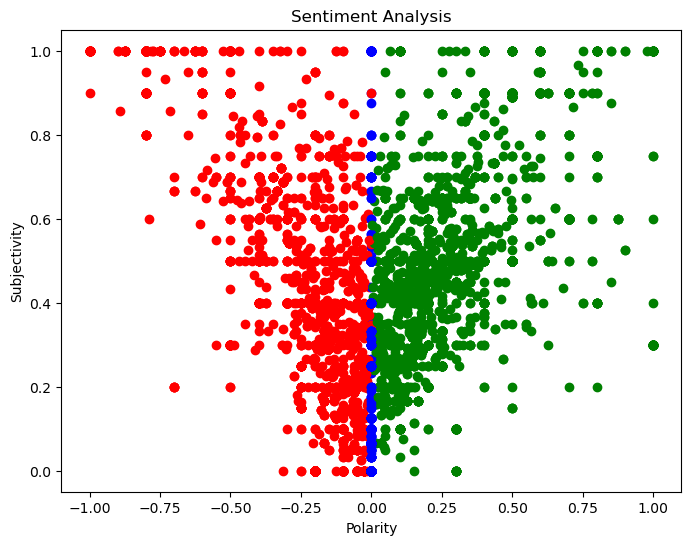

In [22]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  if(df['Polarity'][i]<0):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Red')
  elif(df['Polarity'][i]>0):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Green')    
  else:
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()  

In [57]:
from sklearn.feature_extraction.text import CountVectorizer


In [58]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['tweets'])
X = df['tweets']
Y = df['Analysis']
X = vect.transform(X)


In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (13928, 179688)
Size of y_train: (13928,)
Size of x_test: (3482, 179688)
Size of y_test: (3482,)


In [61]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [62]:
df

,name,username,description,location,followers,numberstatuses,time,tweets,clean_tweet,Subjectivity,Polarity,Analysis
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,messag truth syria sheikh muham maqdisi: http:...,0.000000,0.000000,Neutral
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,"sheikh fatih jawlani 'for peopl integrity, sac...",0.833333,0.433333,Positive
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,first audio meet with sheikh fatih jawlani (ha...,0.333333,0.250000,Positive
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,"sheikh nasir wuhayshi (ha), leader aqap: 'the ...",0.000000,0.000000,Neutral
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,aqap: 'respons sheikh baghdadi statement 'alth...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
17405,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:46,#Breaking\n#IslamicState \n#AmaqAgency \n\n#Fr...,#break #islamicst #amaqag #fridaythe13th #dolc...,0.000000,0.000000,Neutral
17406,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:50,#Breaking\n\n Iraqi forces bulldozer destroyed...,#break iraqi forc bulldoz destroy guid missil ...,0.000000,-0.200000,Negative
17407,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 15:51,#Breaking \n#AmaqAgency \n#IslamicState \n\n#E...,#break #amaqag #islamicst #eastofhaditha https...,0.000000,0.000000,Neutral
17408,Anaksabil97,nvor85j,NaN,NaN,238,133,5/13/2016 16:07,#PhotoReport \n#WilayatDimasiqh \n\n📷The Condu...,#photoreport #wilayatdimasiqh 📷the conduct bat...,0.000000,0.000000,Neutral


**Using Logistic Regression Model to find accuracy**


In [63]:


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.36%


In [64]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 298  192   17]
 [  16 2295   12]
 [  21  182  449]]


              precision    recall  f1-score   support

           0       0.89      0.59      0.71       507
           1       0.86      0.99      0.92      2323
           2       0.94      0.69      0.79       652

    accuracy                           0.87      3482
   macro avg       0.90      0.75      0.81      3482
weighted avg       0.88      0.87      0.87      3482



In [65]:
from sklearn.svm import LinearSVC

In [66]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
Naive = naive_bayes.MultinomialNB()
Naive.fit(x_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(x_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  76.13440551407237


In [67]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  89.862148190695


In [68]:
print(confusion_matrix(y_test, predictions_SVM))
print("\n")
print(classification_report(y_test, predictions_SVM))

[[ 348  139   20]
 [  17 2291   15]
 [  28  134  490]]


              precision    recall  f1-score   support

           0       0.89      0.69      0.77       507
           1       0.89      0.99      0.94      2323
           2       0.93      0.75      0.83       652

    accuracy                           0.90      3482
   macro avg       0.90      0.81      0.85      3482
weighted avg       0.90      0.90      0.89      3482



## **roBERTa**

# New Section

In [69]:
!pip install transformers

In [70]:
!pip install scipy

In [71]:
 from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [72]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

In [73]:
!pip install torch torchvision torchaudio


In [74]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

roberta = "roberta-base"  # or your specific RoBERTa model path
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
def roberta_analysis(tweet_proc):
    string=""
    encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
# output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
    output = model(**encoded_tweet)

    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    for i in range(len(scores)):
    
         l = labels[i]
         s = scores[i]
         string=l+" "+str(s)
         print(string)

In [76]:
k=0
for tweet in df['clean_tweet']:
    if(k<10):
      print(tweet)
      roberta_analysis(tweet)
      k=k+1
    else:
      break  

messag truth syria sheikh muham maqdisi: http://t.co/73xfszsjvr http://t.co/x8bzcscxzq
Negative 0.51825446
Neutral 0.4817455
sheikh fatih jawlani 'for peopl integrity, sacrific easy' http://t.co/uqqzxggvtz http://t.co/a7nbjwyhbr
Negative 0.5200245
Neutral 0.47997555
first audio meet with sheikh fatih jawlani (ha): http://t.co/tgxt1gdgw7 http://t.co/zue8eisze6
Negative 0.51699615
Neutral 0.48300382
sheikh nasir wuhayshi (ha), leader aqap: 'the promis victory': http://t.co/3qg5dkliwr http://t.co/7bqk1wjazc
Negative 0.5159159
Neutral 0.48408413
aqap: 'respons sheikh baghdadi statement 'although disbeliev dislik it.' http://t.co/2eym9eymt
Negative 0.5207441
Neutral 0.47925588
second clip da'wah seri soldier video link :http://t.co/epaprlph5w http://t.co/4vuyszairt
Negative 0.5159269
Neutral 0.4840731
english transcript murabit! http://t.co/hujlj9kgkg http://t.co/t9ixmtbvgk
Negative 0.5206527
Neutral 0.47934726
collect word u'lama regard dawlah': http://t.co/ajbaywnxdq http://t.co/maycbhauz

In [77]:
print(df['clean_tweet'][42])
roberta_analysis(df['clean_tweet'][42])

@skxx51 truth behind jan13 where he' assert that start infight kill muhajireen @striv3ric @war_reports(4)
Negative 0.5148797
Neutral 0.48512024
